<a href="https://colab.research.google.com/github/bosiqbal/deteksiroboflow/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
project = rf.workspace("mobil-8tpfl").project("cars-models-we6mz")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cars-models-1 in yolov8:: 100%|██████████| 52/52 [00:00<00:00, 2335.38it/s]


In [ ]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/cars-models-1


In [ ]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/cars-models-1/data.yaml", epochs=75, imgsz=640)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cars-models-1/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/cars-models-1/train/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/cars-models-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75         0G       2.57      3.431      2.341         80        640: 100%|██████████| 1/1 [00:13<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          4         21     0.0105      0.333     0.0392     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75         0G      2.304       3.49      2.058        109        640: 100%|██████████| 1/1 [00:12<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all          4         21     0.0104      0.333     0.0548     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75         0G      2.405      3.609      2.012        139        640: 100%|██████████| 1/1 [00:15<00:00, 15.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          4         21     0.0119      0.381     0.0625     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75         0G      2.172      3.364      2.021         71        640: 100%|██████████| 1/1 [00:13<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21     0.0119      0.381     0.0656     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75         0G       2.54      3.528      2.088        108        640: 100%|██████████| 1/1 [00:15<00:00, 15.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all          4         21     0.0152      0.476      0.112     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75         0G      2.416      3.399      2.053         87        640: 100%|██████████| 1/1 [00:13<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         21     0.0174      0.524      0.147     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75         0G      2.374      3.269      1.844        106        640: 100%|██████████| 1/1 [00:12<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         21     0.0184      0.524      0.183     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75         0G      2.263      3.172      1.852        100        640: 100%|██████████| 1/1 [00:12<00:00, 12.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all          4         21     0.0214      0.571      0.179      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75         0G      2.173      3.177      1.773         97        640: 100%|██████████| 1/1 [00:15<00:00, 15.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          4         21      0.023      0.571      0.219      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75         0G      2.253      2.994      1.817        106        640: 100%|██████████| 1/1 [00:13<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21     0.0273      0.619      0.256     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75         0G       2.27      2.876       1.84        115        640: 100%|██████████| 1/1 [00:13<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all          4         21     0.0259      0.571      0.228     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75         0G      2.338      2.804      1.855        105        640: 100%|██████████| 1/1 [00:14<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         21      0.026      0.571      0.286      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75         0G      2.261      2.574      1.678         98        640: 100%|██████████| 1/1 [00:13<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         21     0.0301      0.714      0.324      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75         0G      2.238      2.506      1.695         85        640: 100%|██████████| 1/1 [00:15<00:00, 15.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          4         21     0.0332       0.81      0.323      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75         0G      2.179       2.24      1.697         64        640: 100%|██████████| 1/1 [00:12<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         21     0.0329       0.81      0.372      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75         0G      2.082      2.105      1.593        135        640: 100%|██████████| 1/1 [00:12<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all          4         21     0.0319       0.81      0.395      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75         0G      2.044      2.097      1.557        114        640: 100%|██████████| 1/1 [00:13<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all          4         21     0.0302       0.81      0.366      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75         0G       2.26      2.139      1.578        111        640: 100%|██████████| 1/1 [00:14<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          4         21     0.0302       0.81      0.366      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75         0G      2.046       2.27      1.574         78        640: 100%|██████████| 1/1 [00:13<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         21       0.03       0.81      0.368      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75         0G      2.108      1.949       1.65        118        640: 100%|██████████| 1/1 [00:14<00:00, 14.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         21       0.03       0.81      0.368      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75         0G      2.195      2.145      1.698         90        640: 100%|██████████| 1/1 [00:13<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         21     0.0304       0.81      0.351      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75         0G      2.157      1.813      1.588        113        640: 100%|██████████| 1/1 [00:13<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21     0.0304       0.81      0.351      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75         0G      1.993      1.747      1.532        125        640: 100%|██████████| 1/1 [00:14<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21     0.0283      0.762      0.327      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75         0G      1.977      1.775      1.518        116        640: 100%|██████████| 1/1 [00:12<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         21     0.0283      0.762      0.327      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75         0G      2.057      1.801      1.515        120        640: 100%|██████████| 1/1 [00:13<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         21     0.0211      0.571       0.33      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75         0G      1.996      1.718      1.514        128        640: 100%|██████████| 1/1 [00:14<00:00, 14.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         21     0.0211      0.571       0.33      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75         0G      2.059      1.803      1.605         91        640: 100%|██████████| 1/1 [00:11<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all          4         21     0.0215      0.571      0.347      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75         0G      2.005      1.805      1.529        125        640: 100%|██████████| 1/1 [00:13<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          4         21     0.0215      0.571      0.347      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75         0G      2.141      1.861      1.579        134        640: 100%|██████████| 1/1 [00:14<00:00, 14.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         21      0.022      0.571      0.321      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75         0G      1.967      1.694      1.521        114        640: 100%|██████████| 1/1 [00:13<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all          4         21      0.022      0.571      0.321      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75         0G      1.775      1.652      1.436         98        640: 100%|██████████| 1/1 [00:14<00:00, 14.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         21     0.0219      0.571      0.278     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75         0G      1.822      1.564      1.431        129        640: 100%|██████████| 1/1 [00:16<00:00, 16.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all          4         21     0.0219      0.571      0.278     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75         0G      1.866      1.686      1.466         85        640: 100%|██████████| 1/1 [00:12<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         21     0.0183      0.476      0.262     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75         0G      1.872      1.687      1.413        122        640: 100%|██████████| 1/1 [00:12<00:00, 12.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         21     0.0183      0.476      0.262     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75         0G      1.666      1.588      1.409        100        640: 100%|██████████| 1/1 [00:13<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         21     0.0187      0.476      0.267     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75         0G      1.813      1.595      1.422        131        640: 100%|██████████| 1/1 [00:12<00:00, 12.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         21     0.0187      0.476      0.267     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75         0G       1.88      1.727      1.506        119        640: 100%|██████████| 1/1 [00:16<00:00, 16.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21     0.0185      0.476      0.258     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75         0G      1.804      1.684      1.452        102        640: 100%|██████████| 1/1 [00:16<00:00, 16.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          4         21     0.0185      0.476      0.258     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75         0G      1.698      1.506      1.383        131        640: 100%|██████████| 1/1 [00:14<00:00, 14.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         21      0.017      0.429       0.25      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75         0G      1.762      1.471      1.336        133        640: 100%|██████████| 1/1 [00:14<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         21      0.017      0.429       0.25      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75         0G      1.746       1.49      1.391        132        640: 100%|██████████| 1/1 [00:13<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         21      0.019      0.476      0.157     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75         0G      1.765       1.57      1.438         89        640: 100%|██████████| 1/1 [00:12<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         21      0.019      0.476      0.157     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75         0G      1.709      1.447      1.349        114        640: 100%|██████████| 1/1 [00:13<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         21     0.0169      0.429      0.129     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75         0G      1.687      1.477      1.345        124        640: 100%|██████████| 1/1 [00:13<00:00, 13.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         21     0.0169      0.429      0.129     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75         0G      1.851      1.416      1.428        133        640: 100%|██████████| 1/1 [00:13<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all          4         21      0.015      0.381      0.175     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75         0G      1.603       1.47      1.358         94        640: 100%|██████████| 1/1 [00:12<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          4         21      0.015      0.381      0.175     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75         0G      1.697      1.493      1.386         94        640: 100%|██████████| 1/1 [00:11<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all          4         21      0.147      0.238      0.183     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75         0G      1.436      1.449      1.255         83        640: 100%|██████████| 1/1 [00:12<00:00, 12.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all          4         21      0.147      0.238      0.183     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75         0G      1.601      1.341      1.272        138        640: 100%|██████████| 1/1 [00:12<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all          4         21      0.488       0.19      0.169     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75         0G      1.575       1.45      1.369        115        640: 100%|██████████| 1/1 [00:11<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all          4         21      0.488       0.19      0.169     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75         0G      1.495      1.422      1.291        110        640: 100%|██████████| 1/1 [00:13<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         21       0.41      0.134      0.181     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75         0G      1.694       1.47      1.318        123        640: 100%|██████████| 1/1 [00:12<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         21       0.41      0.134      0.181     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75         0G      1.585      1.572      1.414         77        640: 100%|██████████| 1/1 [00:12<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          4         21       0.41      0.134      0.181     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75         0G      1.565      1.475      1.294        112        640: 100%|██████████| 1/1 [00:12<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          4         21      0.432       0.19      0.195     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75         0G      1.563      1.397      1.307        129        640: 100%|██████████| 1/1 [00:12<00:00, 12.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         21      0.432       0.19      0.195     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75         0G      1.434      1.435      1.295         74        640: 100%|██████████| 1/1 [00:12<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         21      0.432       0.19      0.195     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75         0G      1.538      1.382      1.302         90        640: 100%|██████████| 1/1 [00:13<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          4         21      0.468       0.21      0.184     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75         0G       1.53       1.36      1.233        119        640: 100%|██████████| 1/1 [00:12<00:00, 12.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         21      0.468       0.21      0.184     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75         0G      1.513      1.404      1.289         94        640: 100%|██████████| 1/1 [00:12<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         21      0.468       0.21      0.184     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75         0G      1.557        1.3      1.287         97        640: 100%|██████████| 1/1 [00:12<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         21      0.409       0.19      0.193     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75         0G      1.588      1.422      1.307        105        640: 100%|██████████| 1/1 [00:12<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         21      0.409       0.19      0.193     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75         0G      1.484      1.273      1.261        107        640: 100%|██████████| 1/1 [00:12<00:00, 12.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         21      0.409       0.19      0.193     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75         0G      1.475      1.363      1.241        140        640: 100%|██████████| 1/1 [00:12<00:00, 12.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         21      0.441      0.238      0.198     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75         0G      1.619      1.507      1.307         83        640: 100%|██████████| 1/1 [00:14<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         21      0.441      0.238      0.198     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75         0G      1.465      1.389      1.319         85        640: 100%|██████████| 1/1 [00:12<00:00, 12.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         21      0.441      0.238      0.198     0.0749


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75         0G      1.399      1.276      1.215         72        640: 100%|██████████| 1/1 [00:12<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         21      0.486      0.271      0.212      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75         0G      1.341      1.288      1.211         70        640: 100%|██████████| 1/1 [00:12<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          4         21      0.486      0.271      0.212      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75         0G      1.284      1.275      1.141         70        640: 100%|██████████| 1/1 [00:12<00:00, 12.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         21      0.486      0.271      0.212      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75         0G      1.391      1.306      1.252         72        640: 100%|██████████| 1/1 [00:12<00:00, 12.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         21      0.449      0.286      0.241     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75         0G      1.429      1.334      1.207         72        640: 100%|██████████| 1/1 [00:12<00:00, 12.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         21      0.449      0.286      0.241     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75         0G      1.308      1.241      1.169         72        640: 100%|██████████| 1/1 [00:12<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         21      0.449      0.286      0.241     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75         0G      1.498      1.347      1.267         73        640: 100%|██████████| 1/1 [00:12<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          4         21      0.467      0.286      0.231     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75         0G       1.45      1.278      1.312         73        640: 100%|██████████| 1/1 [00:12<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         21      0.467      0.286      0.231     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75         0G      1.515      1.288      1.276         73        640: 100%|██████████| 1/1 [00:12<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         21      0.467      0.286      0.231     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75         0G      1.318      1.197      1.185         73        640: 100%|██████████| 1/1 [00:12<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         21      0.462      0.286      0.247     0.0781



75 epochs completed in 0.326 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


                   all          4         21     0.0318       0.81      0.395      0.149
                  cars          4         21     0.0318       0.81      0.395      0.149
Speed: 2.5ms preprocess, 239.8ms inference, 0.0ms loss, 20.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed494821cc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
dataset = version.download("yolov8")

In [ ]:
result = model.predict(source="/content/cars-models-1/valid/images", save=True, imgsz=640)


image 1/4 /content/cars-models-1/valid/images/1_16a080270ef-841689_1611123565_16a080270ef_medium_jpg.rf.f31969aa9960b8ab38a20f3641ec1d90.jpg: 640x640 2 persons, 1 bicycle, 9 cars, 1 bus, 7 traffic lights, 260.2ms
image 2/4 /content/cars-models-1/valid/images/1_16a083a0658-1540244_2581304591_16a083a0658_medium_jpg.rf.0b566e50c42146fbc5f746996e82ecbd.jpg: 640x640 7 cars, 2 trucks, 256.6ms
image 3/4 /content/cars-models-1/valid/images/2018-12-10-18-38-24_jpg.rf.d4a153439dc12b65dfed774950120656.jpg: 640x640 22 cars, 2 buss, 1 truck, 1 traffic light, 283.5ms
image 4/4 /content/cars-models-1/valid/images/54545_png.rf.8ba13a13e5478aaabfb4d1f01c5d95ad.jpg: 640x640 14 cars, 1 bus, 1 truck, 302.1ms
Speed: 4.0ms preprocess, 275.6ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


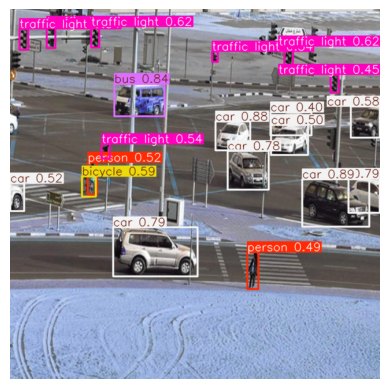

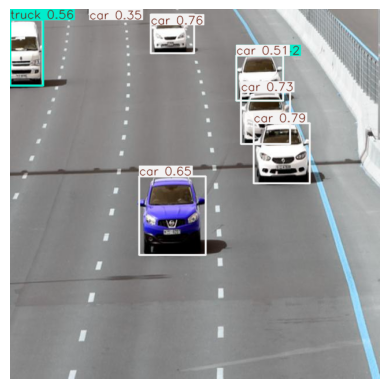

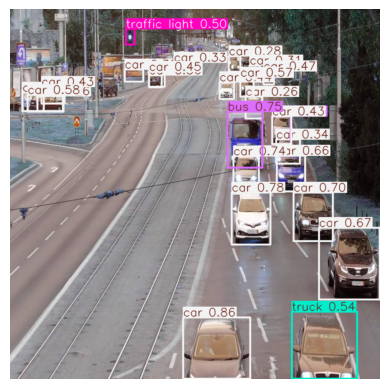

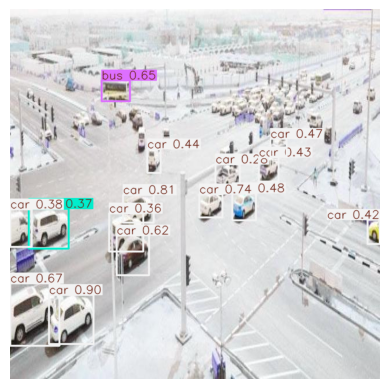

In [ ]:
# Menampilkan semua hasil prediksi
import matplotlib.pyplot as plt

# Loop melalui semua gambar hasil prediksi
for image_result in result:
    # Plot setiap hasil prediksi
    image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

    # Tampilkan menggunakan Matplotlib
    plt.imshow(image_path_with_predictions)
    plt.axis("off")
    plt.show()

In [ ]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving 1_16a083a0658-1540244_2581304591_16a083a0658_medium_jpg.rf.0b566e50c42146fbc5f746996e82ecbd.jpg to 1_16a083a0658-1540244_2581304591_16a083a0658_medium_jpg.rf.0b566e50c42146fbc5f746996e82ecbd (2).jpg
Saving 1_16a080270ef-841689_1611123565_16a080270ef_medium_jpg.rf.f31969aa9960b8ab38a20f3641ec1d90.jpg to 1_16a080270ef-841689_1611123565_16a080270ef_medium_jpg.rf.f31969aa9960b8ab38a20f3641ec1d90 (1).jpg
Saving 2018-12-10-18-38-24_jpg.rf.d4a153439dc12b65dfed774950120656.jpg to 2018-12-10-18-38-24_jpg.rf.d4a153439dc12b65dfed774950120656 (1).jpg
Saving 54545_png.rf.8ba13a13e5478aaabfb4d1f01c5d95ad.jpg to 54545_png.rf.8ba13a13e5478aaabfb4d1f01c5d95ad (1).jpg


In [ ]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

In [ ]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/1_16a083a0658-1540244_2581304591_16a083a0658_medium_jpg.rf.0b566e50c42146fbc5f746996e82ecbd (2).jpg: 640x640 7 cars, 2 trucks, 234.0ms
Speed: 3.2ms preprocess, 234.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [ ]:
cv2.imwrite("/content/runs/detect/train/train_batch0.jpg", annotated_img)

True

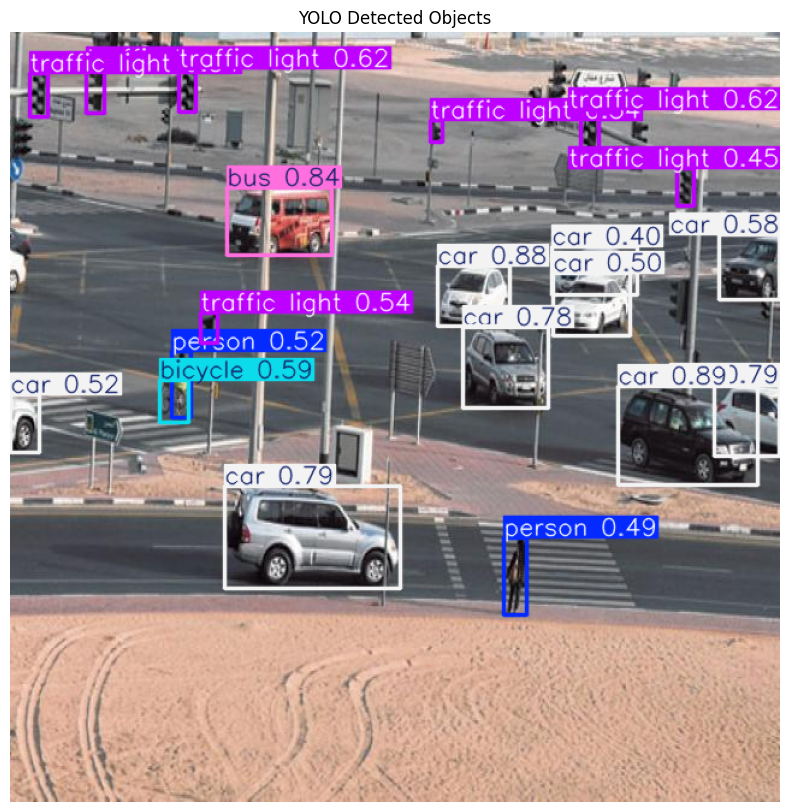

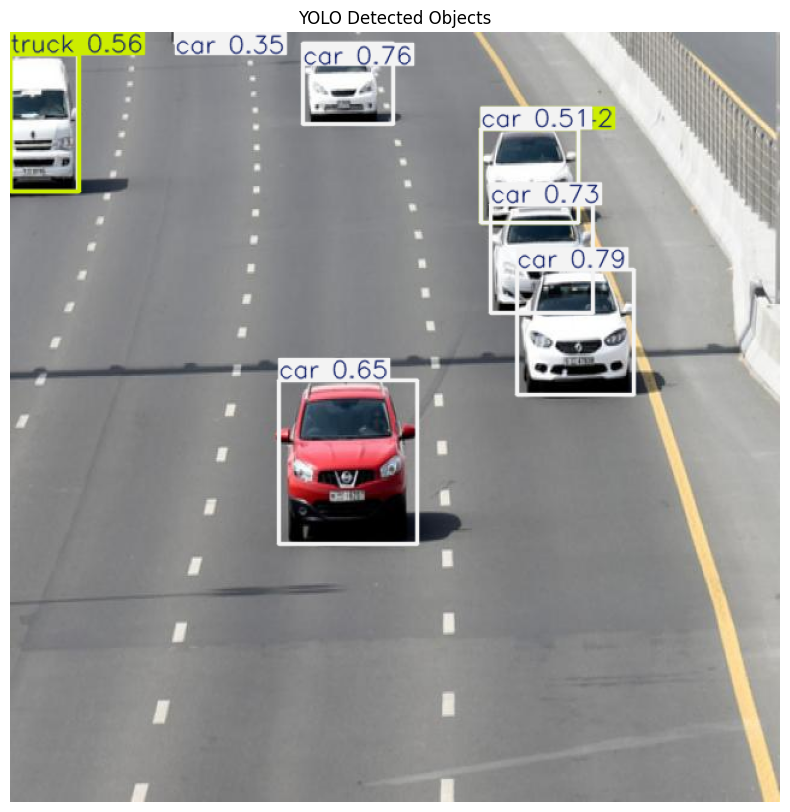

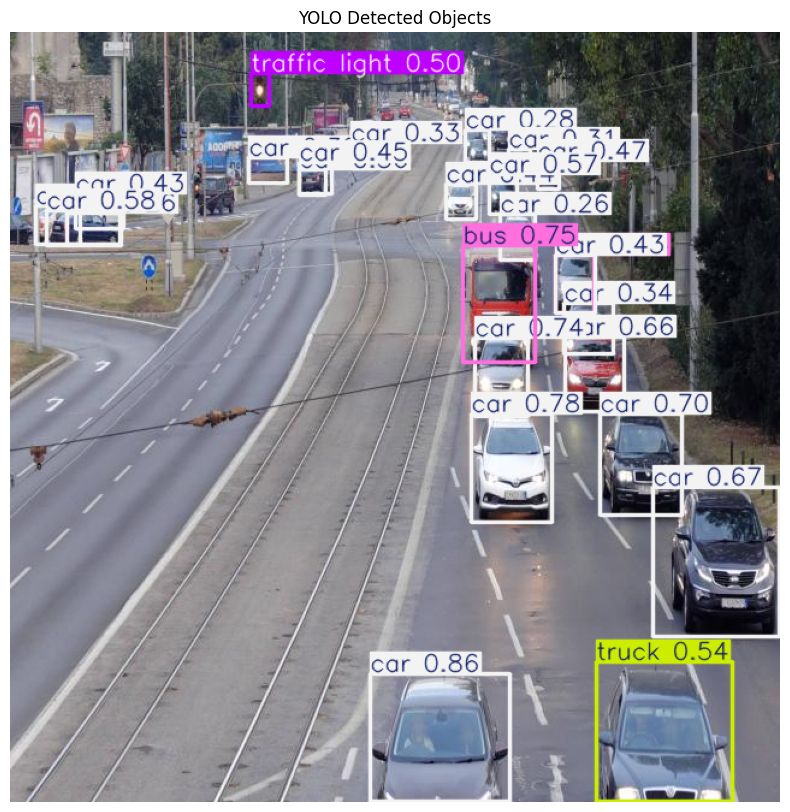

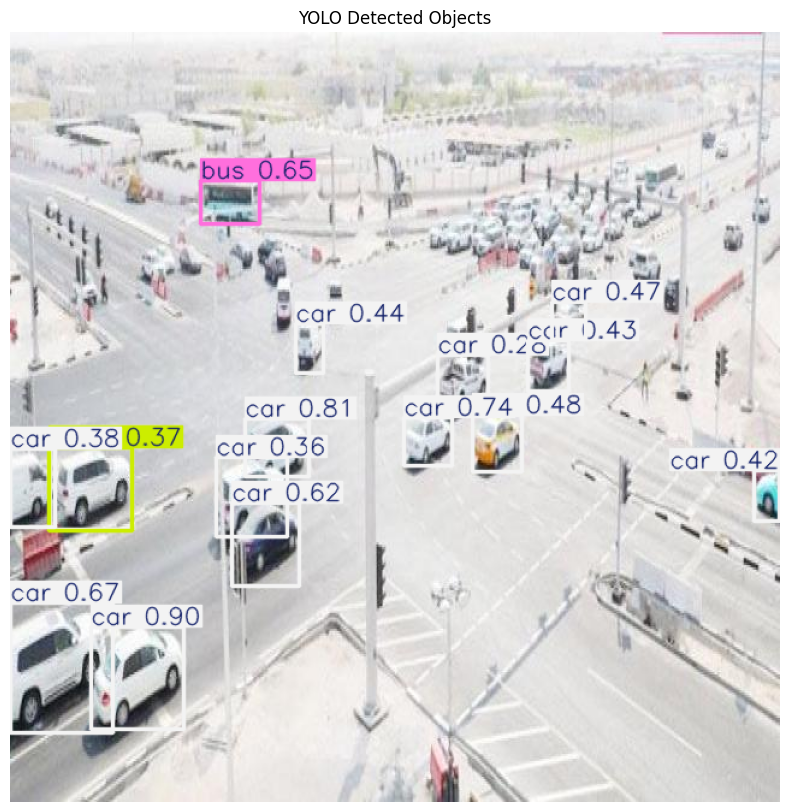

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Loop melalui semua hasil prediksi
for image_result in result:
    # Ambil gambar yang sudah dianotasi
    annotated_img = image_result.plot()  # Mengembalikan array gambar dengan bounding box

    # Tampilkan gambar menggunakan Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("YOLO Detected Objects")
    plt.show()